In [294]:
# Raphaela's Open Data Project


In [295]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import geopandas as gp
from pandas import DataFrame
import fiona
from mpl_toolkits.basemap import Basemap
from matplotlib import rc


ModuleNotFoundError: No module named 'geopandas'

Some magic that tells jupyter to put graphs and things in the notebook instead of the default behaviour which is to save it as a file.

In [296]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [297]:
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

Let's check to see if we've already downloaded the data. It's a big file, so we don't want to do it every time we run the code. Even just loading from file takes a few seconds!

Pandas is pretty smart, it can get data from the internet just as easily as from the file system, it just takes a bit longer.


In [369]:
filepath = "XLS_files\walmart_chart.xlsx"
print("loading from file")

walmart_chart = pd.read_excel(filepath)
print("done")

loading from file
done


In [299]:
# Walmart's net sales from 2006 to 2019 (in billion U.S. dollars)

In [370]:
walmart_chart.head(50)

,Year,US$ Bn
0,2006,308.95
1,2007,344.76
2,2008,373.82
3,2009,401.09
4,2010,404.74
5,2011,418.50
6,2012,443.42
7,2013,465.60
8,2014,473.08
9,2015,482.23


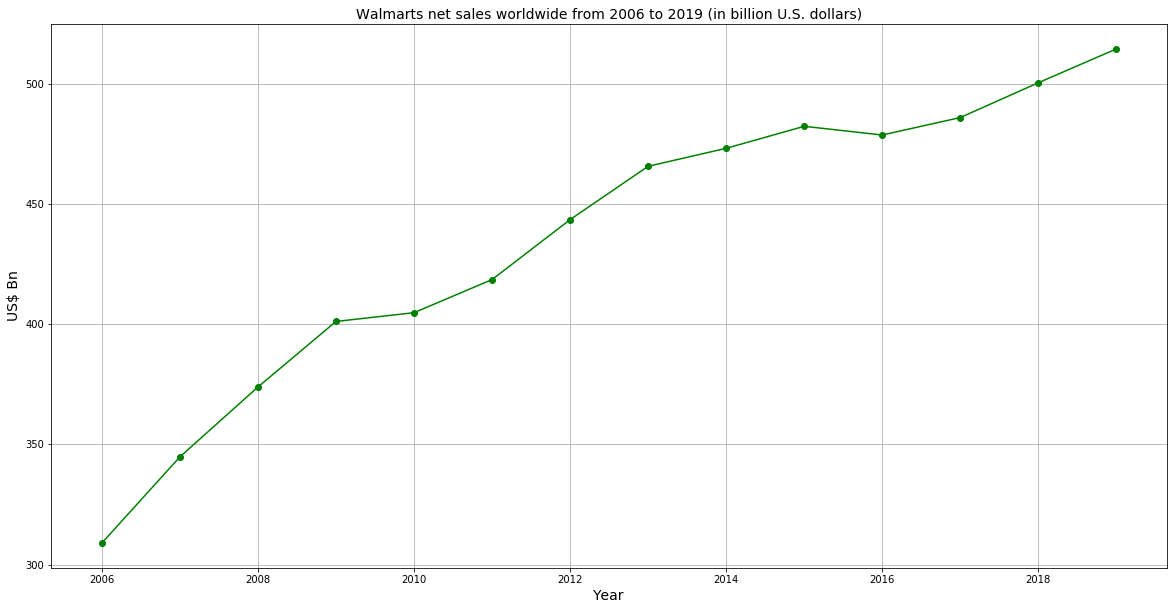

In [301]:

Data = {'Year': [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
        'US$ Bn': [308.95, 344.76, 373.82, 401.09, 404.74, 418.50, 443.42, 465.60, 473.08, 482.23, 478.61, 485.87, 500.34, 514.41]
       }
  
df = pd.DataFrame(Data,columns=['Year','US$ Bn'])
  
plt.plot(df['Year'], df['US$ Bn'], color='green', marker='o')
plt.title('Walmarts net sales worldwide from 2006 to 2019 (in billion U.S. dollars)', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('US$ Bn', fontsize=14)
plt.grid(True)
plt.show()

In [302]:
from pandas import ExcelWriter
from pandas import ExcelFile

excel_data_df = pd.read_excel('XLS_files\walmart_chart.xlsx', sheet_name='Chart 2', skiprows= 1)

In [303]:
# Walmart's net sales worldwide from 2008 to 2019, by division (in billion U.S. dollars)

In [304]:
excel_data_df.head(50)

,US$ Bn,Walmart U.S.,Walmart International,Sam's Club
0,2008,238.92,90.57,44.34
1,2009,256.97,96.14,47.98
2,2010,259.92,97.41,47.81
3,2011,260.26,109.23,49.46
4,2012,264.19,125.44,53.80
5,2013,274.43,134.75,56.42
6,2014,279.41,136.51,57.16
7,2015,288.05,136.16,58.02
8,2016,298.38,123.41,56.83
9,2017,307.83,116.12,57.37


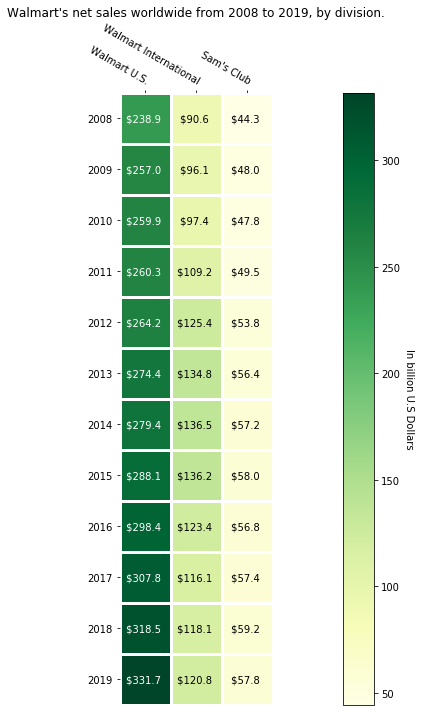

In [305]:
matplotlib.axes.Axes.imshow
matplotlib.pyplot.imshow
matplotlib.figure.Figure.colorbar
matplotlib.pyplot.colorbar

# sphinx_gallery_thumbnail_number = 2

year = ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
company = ["Walmart U.S.", "Walmart International", "Sam's Club"]

dollar = np.array([[238.92, 90.57, 44.34],
                    [256.97, 96.14, 47.98],
                    [259.92, 97.41, 47.81],
                    [260.26, 109.23, 49.46],
                    [264.19, 125.44, 53.80],
                    [274.43, 134.75, 56.42],
                    [279.41, 136.51, 57.16],
                    [288.05, 136.16, 58.02],
                    [298.38, 123.41, 56.83],
                    [307.83, 116.12, 57.37],
                    [318.48, 118.07, 59.22],                    
                    [331.67, 120.82, 57.84]])
        

def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    
    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

fig, ax = plt.subplots()

im, cbar = heatmap(dollar, year, company, ax=ax,
                   cmap="YlGn", cbarlabel="In billion U.S Dollars")
texts = annotate_heatmap(im, valfmt="${x:.1f} ")

ax.set_title("Walmart's net sales worldwide from 2008 to 2019, by division.")
fig.tight_layout()
plt.show()


In [306]:
from pandas import ExcelWriter
from pandas import ExcelFile

excel_data_df = pd.read_excel('XLS_files\walmart_chart.xlsx', sheet_name='Chart 5', skiprows= 1)

In [307]:
# Share of Walmart's net sales from 2008 to 2019, by division

In [308]:
excel_data_df.head(50)

,Year,Walmart U.S.,Walmart International,Sam's Club
0,2008,0.639,0.242,0.119
1,2009,0.640,0.240,0.120
2,2010,0.642,0.240,0.118
3,2011,0.621,0.261,0.118
4,2012,0.596,0.283,0.121
5,2013,0.590,0.289,0.121
6,2014,0.590,0.289,0.121
7,2015,0.598,0.282,0.120
8,2016,0.623,0.258,0.119
9,2017,0.640,0.241,0.119


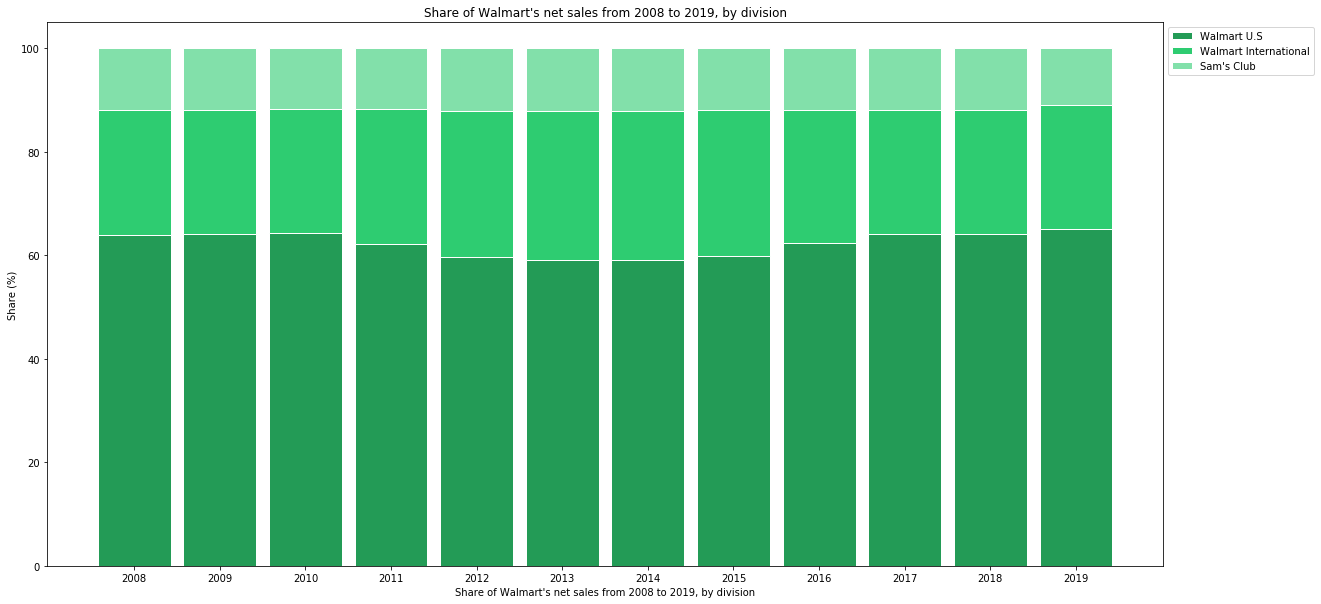

In [309]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
# Data
r = [0,1,2,3,4,5,6,7,8,9,10,11]
raw_data = {'greenBars': [63.9, 64.0, 64.2, 62.1, 59.6, 59.0, 59.0, 59.8, 62.3, 64.0, 64.0, 65.0], 'orangeBars': [24.2, 24.0, 24.0, 26.1, 28.3,  28.9, 28.9, 28.2, 25.8, 24.1, 24.0, 24.0],'blueBars': [11.9, 12.0, 11.8, 11.8, 12.1, 12.1, 12.1, 12.0, 11.9, 11.9, 12.0, 11.0]}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j+k for i,j,k in zip(df['greenBars'], df['orangeBars'], df['blueBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]
 
# plot
barWidth = 0.85
names = ('2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019')

# Create green Bars
plt.bar(r, greenBars, color='#239B56', edgecolor='white', width=barWidth, label="Walmart U.S")
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='#2ECC71', edgecolor='white', width=barWidth, label="Walmart International")
# Create blue Bars
plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#82E0AA', edgecolor='white', width=barWidth, label="Sam's Club")
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("Share of Walmart's net sales from 2008 to 2019, by division")
 
plt.ylabel('Share (%)')

# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
 
# Show graphic
plt.title("Share of Walmart's net sales from 2008 to 2019, by division")
plt.show()


In [310]:
excel_data_df = pd.read_excel('XLS_files\walmart_chart.xlsx', sheet_name='Chart 4', skiprows= 1)


In [311]:
# Growth in Walmart's net sales worldwide from 2006 to 2019

In [312]:
excel_data_df.head(50)

,Year,Growth in net sales
0,2006,0.098
1,2007,0.116
2,2008,0.084
3,2009,0.073
4,2010,0.009
5,2011,0.034
6,2012,0.060
7,2013,0.050
8,2014,0.016
9,2015,0.019


In [313]:
excel_data_df = pd.read_excel('XLS_files\walmart_chart.xlsx', sheet_name='Chart 6', skiprows= 1)

Walmart's gross profit margin worldwide from 2006 to 2019

In [314]:
excel_data_df.head(50)

,Year,Gross profit margin
0,2006,0.231
1,2007,0.234
2,2008,0.241
3,2009,0.243
4,2010,0.249
5,2011,0.248
6,2012,0.245
7,2013,0.243
8,2014,0.243
9,2015,0.243


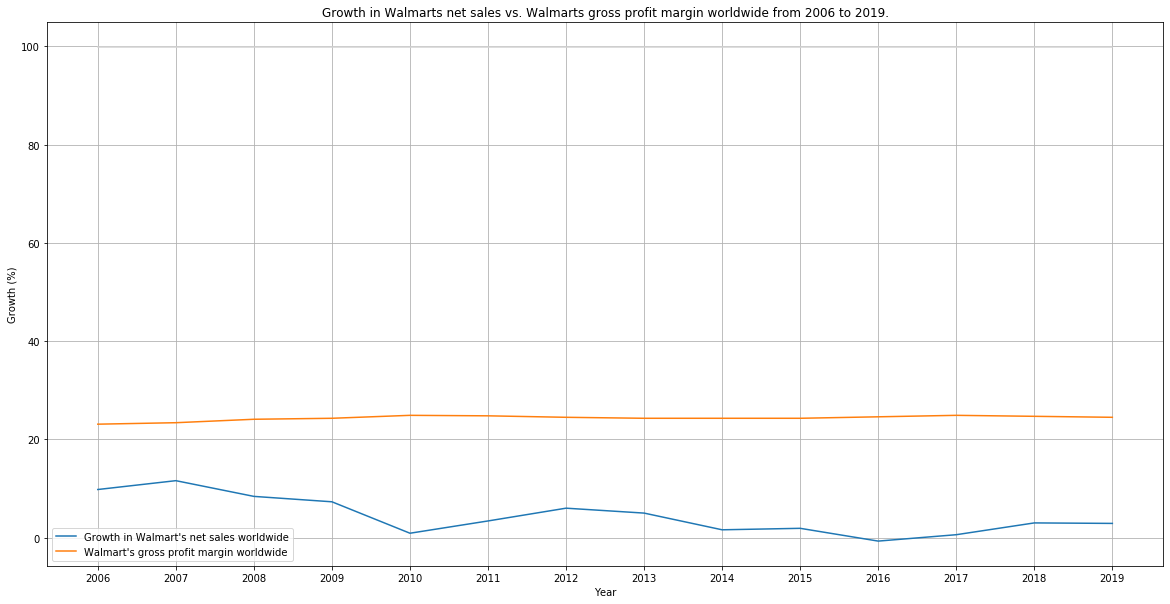

In [315]:
import matplotlib.pyplot as plt
# line 1 points
x1 = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
y1 = [9.8, 11.6, 8.4, 7.3, 0.9, 3.4, 6.0, 5.0, 1.6, 1.9, -0.7, 0.6, 3.0, 2.9]

# line 2 points
x2 = ['2006', '2007','2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
y2 = [23.10, 23.40, 24.10, 24.30, 24.90, 24.80, 24.50, 24.30, 24.30, 24.30, 24.60, 24.90, 24.70, 24.50]

# increase range - cheat way
x3 = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
y3 = [99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9]
plt.plot(x3, y3, color='lightgrey')
# plotting the line 1 points 
plt.plot(x1, y1, label = "Growth in Walmart's net sales worldwide")
# plotting the line 2 points 
plt.plot(x2, y2, label = "Walmart's gross profit margin worldwide")
plt.xlabel('Year')
# Set the y axis label of the current axis.
plt.ylabel('Growth (%)')
# Set a title of the current axes.
plt.title('Growth in Walmarts net sales vs. Walmarts gross profit margin worldwide from 2006 to 2019.')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.grid(True)
plt.show()


In [316]:
excel_data_df = pd.read_excel('XLS_files\walmart_chart.xlsx', sheet_name='Chart 9', skiprows= 1)

In [317]:
excel_data_df.head(50)

,Year,Spending in US$ Bn
0,2009,2.04
1,2010,2.06
2,2011,1.82
3,2012,1.81
4,2013,1.93
5,2014,1.94
6,2015,2.09
7,2016,2.17
8,2017,2.28


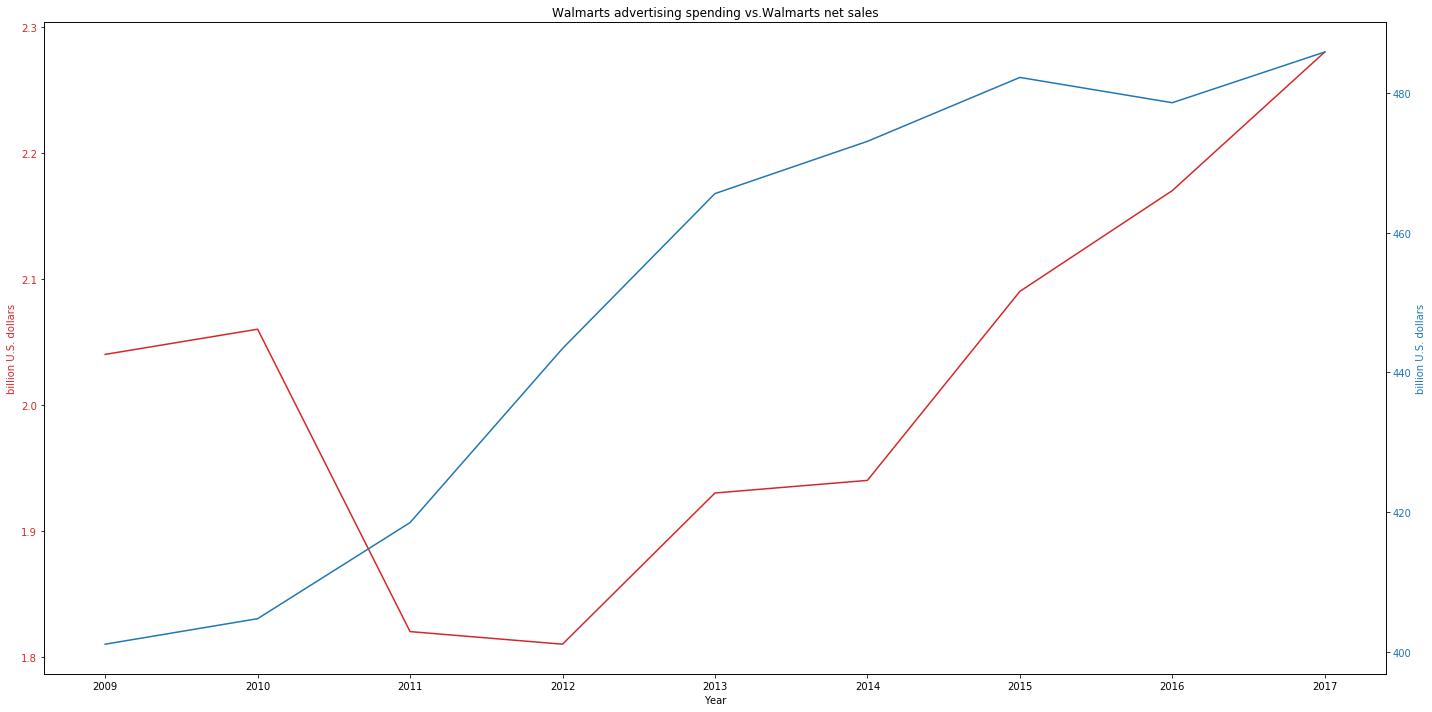

In [318]:
#t = np.arange(2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017)
year = ('2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017')
y_pos = np.arange(len(year))
data1 = (2.04, 2.06, 1.82, 1.81, 1.93, 1.94, 2.09, 2.17, 2.28)
data2 = (401.09, 404.74, 418.50, 443.42, 465.60, 473.08, 482.23, 478.61, 485.87)


fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('billion U.S. dollars', color=color)
ax1.plot(year, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('billion U.S. dollars', color=color)  # we already handled the x-label with ax1
ax2.plot(year, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('Walmarts advertising spending vs.Walmarts net sales')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [319]:
excel_data_df = pd.read_excel('XLS_files\walmart_chart.xlsx', sheet_name='Chart 10', skiprows= 1)

In [320]:
excel_data_df.head(50)

,Year,Number of stores
0,2008,7288
1,2009,7909
2,2010,8099
3,2011,8604
4,2012,9766
5,2013,10408
6,2014,10942
7,2015,11453
8,2016,11528
9,2017,11695


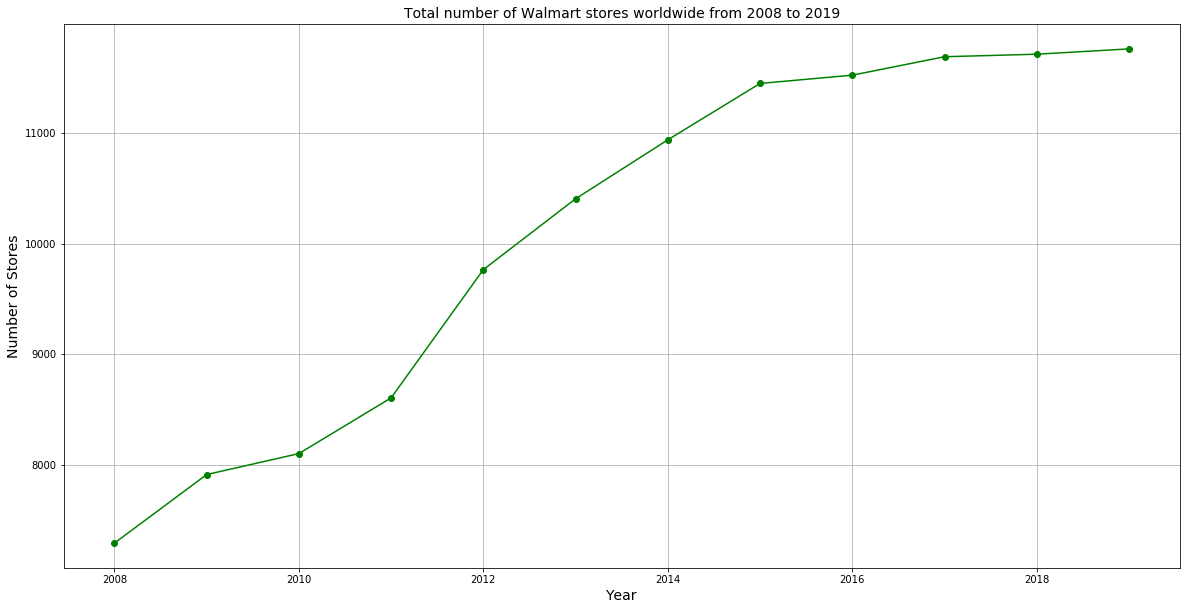

In [321]:
Data = {'Year': [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
        'Number of Stores': [7288, 7909, 8099,8604, 9766, 10408, 10942, 11453, 11528, 11695, 11718, 11766]
       }
  
df = pd.DataFrame(Data,columns=['Year','Number of Stores'])
  
plt.plot(df['Year'], df['Number of Stores'], color='green', marker='o')
plt.title('Total number of Walmart stores worldwide from 2008 to 2019', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Stores', fontsize=14)
plt.grid(True)
plt.show()

In [322]:
excel_data_df = pd.read_excel('XLS_files\walmart_chart.xlsx', sheet_name='Chart 11')

In [323]:
excel_data_df.head(50)

,Year,Walmart U.S. segment,Walmart International segment,Sam`s Club segment
0,2006,3289,2158,567
1,2007,3488,2733,588
2,2008,3595,3093,600
3,2009,3703,3595,611
4,2010,3755,4099,605
5,2011,3804,4557,609
6,2012,3868,5287,611
7,2013,4005,5783,620
8,2014,4203,6107,632
9,2015,4516,6290,647


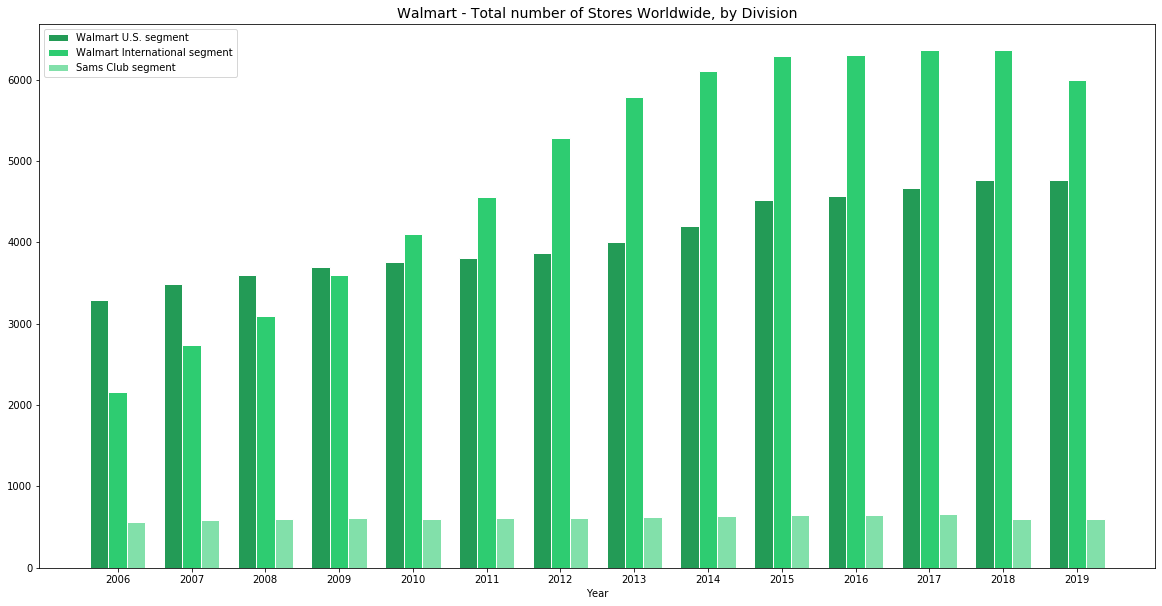

In [324]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [3289, 3488, 3595, 3703, 3755, 3804, 3868, 4005, 4203, 4516, 4574, 4672, 4761, 4769]
bars2 = [2158, 2733, 3093, 3595, 4099, 4557, 5287, 5783, 6107, 6290, 6299, 6363, 6360, 5993]
bars3 = [567, 588, 600, 611, 605, 609, 611, 620, 632, 647, 655, 660, 597, 599]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#239B56', width=barWidth, edgecolor='white', label='Walmart U.S. segment')
plt.bar(r2, bars2, color='#2ECC71', width=barWidth, edgecolor='white', label='Walmart International segment')
plt.bar(r3, bars3, color='#82E0AA', width=barWidth, edgecolor='white', label='Sams Club segment')
 
# Add xticks on the middle of the group bars
plt.xlabel('Year')
plt.xticks([r + barWidth for r in range(len(bars1))], ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'])
plt.title('Walmart - Total number of Stores Worldwide, by Division', fontsize=14)
# Create legend & Show graphic
plt.legend()
plt.show()


In [325]:
excel_data_df = pd.read_excel('XLS_files\walmart_chart.xlsx', sheet_name='Chart 12', skiprows= 1)

In [326]:
excel_data_df.head(50)

,Country,Number of stores
0,Africa,436
1,Argentina,92
2,Canada,411
3,Central America**,811
4,Chile,371
5,China,443
6,India,22
7,Japan,332
8,Mexico,2442
9,United States,4756


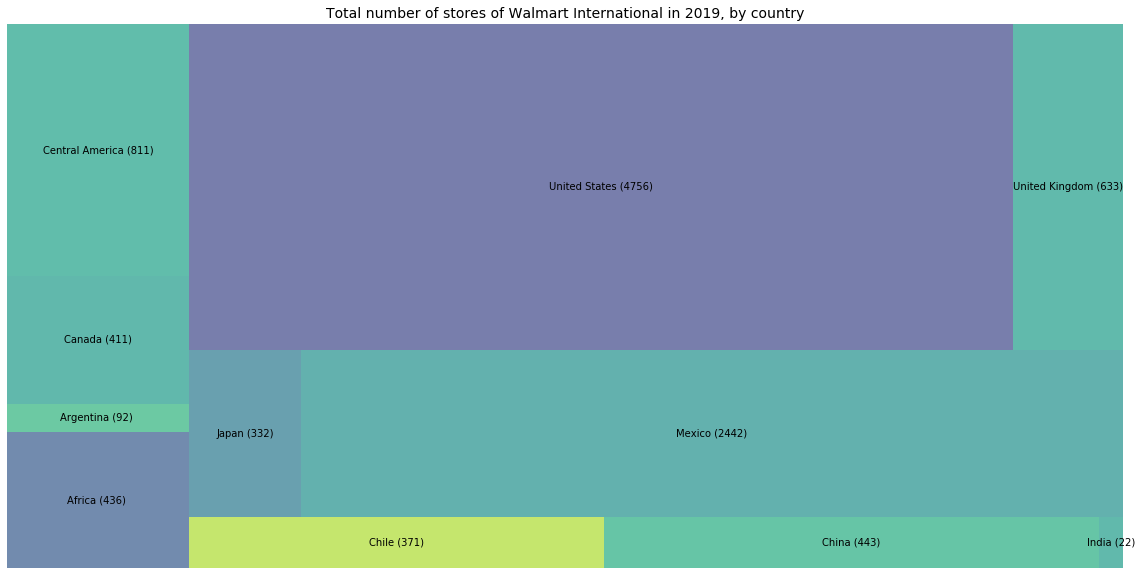

In [327]:
import squarify    # pip install squarify (algorithm for treemap)
 
# If you have 2 lists
squarify.plot(sizes=[436, 92, 411, 811, 371, 443, 22, 332, 2442, 4756, 633], label=["Africa (436) ", "Argentina (92) ", "Canada (411)", "Central America (811)", "Chile (371)", "China (443)", "India (22)", "Japan (332)", "Mexico (2442)", "United States (4756)", "United Kingdom (633)"], alpha=.7 )
plt.axis('off')
plt.title('Total number of stores of Walmart International in 2019, by country', fontsize=14)
plt.show()
 


In [372]:
excel_data_df = pd.read_excel('XLS_files\walmart_chart.xlsx', sheet_name='Chart 13', skiprows= 1)

In [374]:
excel_data_df.head(52)

,Country,No. of Stores
0,Texas,329
1,Florida,191
2,California,167
3,Illinois,137
4,Ohio,136
5,Georgia,128
6,Pennsylvania,119
7,North Carolina,118
8,Missouri,117
9,Tennesse,104


In [375]:
excel_data_df = pd.read_excel('XLS_files\walmart_chart.xlsx', sheet_name='Chart 14', skiprows= 1)

In [376]:
excel_data_df.head(52)

,Country,No. of Stores
0,Texas,392
1,Florida,231
2,California,142
3,Illinois,139
4,Ohio,139
5,Georgia,154
6,Pennsylvania,116
7,North Carolina,144
8,Missouri,112
9,Tennesse,117


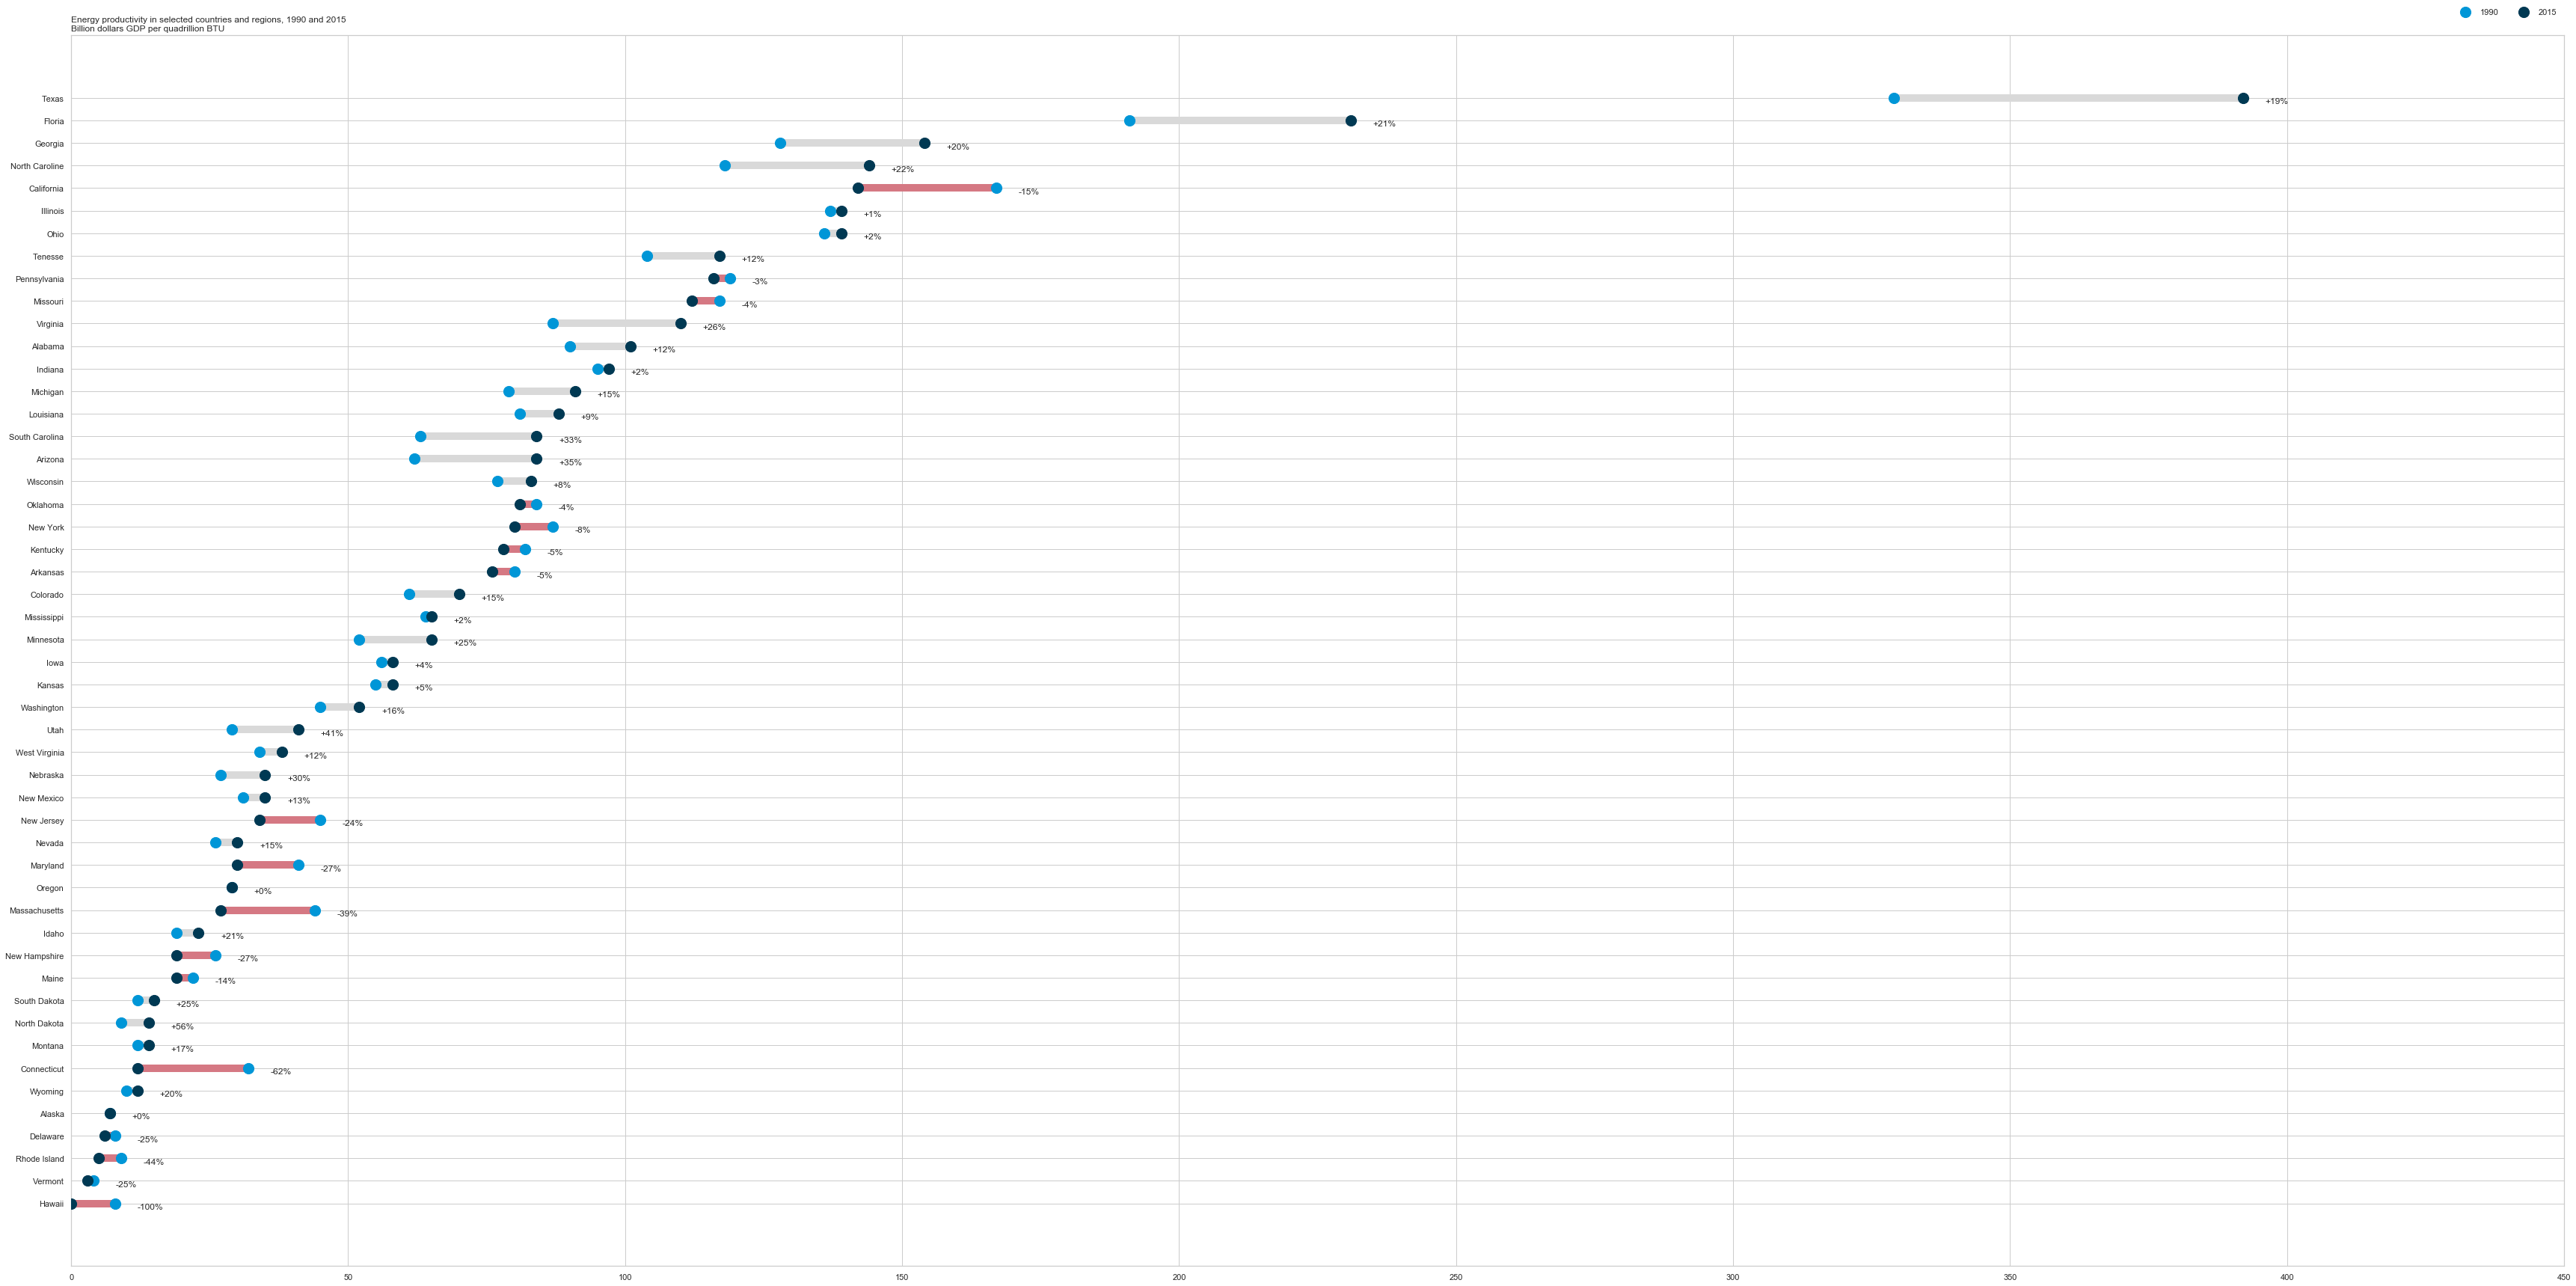

In [411]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
sns.set(style="whitegrid")  # set style

data = io.StringIO(""""Country"  1990  2015
"Texas" 329 392
"Floria" 191 231
"California" 167 142
"Illinois" 137 139
"Ohio" 136 139
"Georgia" 128 154
"Pennsylvania" 119 116
"North Caroline" 118 144
"Missouri" 117 112
"Tenesse" 104 117
"Indiana" 95 97
"Alabama" 90 101
"New York" 87 80
"Virginia" 87 110
"Oklahoma" 84 81
"Kentucky" 82 78
"Louisiana" 81 88
"Arkansas" 80 76
"Michigan" 79 91
"Wisconsin" 77 83
"Mississippi" 64 65
"South Carolina" 63 84
"Arizona" 62 84
"Colorado" 61 70
"Iowa" 56 58
"Kansas" 55 58
"Minnesota" 52 65
"New Jersey" 45 34
"Washington" 45 52
"Massachusetts" 44 27
"Maryland" 41 30
"West Virginia" 34 38
"Connecticut" 32 12
"New Mexico" 31 35
"Oregon" 29 29 
"Utah" 29 41
"Nebraska" 27 35
"Nevada" 26 30
"New Hampshire" 26 19
"Maine" 22 19
"Idaho" 19 23
"Montana" 12 14
"South Dakota" 12 15
"Wyoming" 10 12
"North Dakota" 9 14
"Rhode Island" 9 5
"Delaware" 8 6
"Hawaii" 8 0
"Alaska" 7 7
"Vermont" 4 3""")

df = pd.read_csv(data, sep="\s+", quotechar='"')
df = df.set_index("Country").sort_values("2015")
df["change"] = df["2015"] / df["1990"] - 1


plt.figure(figsize=(48,24))
y_range = np.arange(1, len(df.index) + 1)
colors = np.where(df['2015'] > df['1990'], '#d9d9d9', '#d57883')
plt.hlines(y=y_range, xmin=df['1990'], xmax=df['2015'],
           color=colors, lw=10)
plt.scatter(df['1990'], y_range, color='#0096d7', s=200, label='1990', zorder=3)
plt.scatter(df['2015'], y_range, color='#003953', s=200 , label='2015', zorder=3)
for (_, row), y in zip(df.iterrows(), y_range):
    plt.annotate(f"{row['change']:+.0%}", (max(row["1990"], row["2015"]) + 4, y - 0.25))
plt.legend(ncol=2, bbox_to_anchor=(1., 1.01), loc="lower right", frameon=False)

plt.yticks(y_range, df.index)
plt.title("Energy productivity in selected countries and regions, 1990 and 2015\nBillion dollars GDP per quadrillion BTU", loc='left')
plt.xlim(0, 450)
plt.gcf().subplots_adjust(left=0.35)
plt.tight_layout()
plt.show()

df = pd.read_csv('https://github.com/selva86/datasets/raw/master/mortality.csv')

# Define the upper limit, lower limit, interval of Y axis and colors
y_LL = 100
y_UL = int(df.iloc[:, 1:].max().max()*1.1)
y_interval = 400
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']    

# Draw Plot and Annotate
fig, ax = plt.subplots(1,1,figsize=(16, 9), dpi= 80)    

columns = df.columns[1:]  
for i, column in enumerate(columns):    
    plt.plot(df.date.values, df[column].values, lw=1.5, color=mycolors[i])    
    plt.text(df.shape[0]+1, df[column].values[-1], column, fontsize=14, color=mycolors[i])

# Draw Tick lines  
for y in range(y_LL, y_UL, y_interval):    
    plt.hlines(y, xmin=0, xmax=71, colors='black', alpha=0.3, linestyles="--", lw=0.5)

# Decorations    
plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)        

# Lighten borders
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)

plt.title('Number of Deaths from Lung Diseases in the UK (1974-1979)', fontsize=22)
plt.yticks(range(y_LL, y_UL, y_interval), [str(y) for y in range(y_LL, y_UL, y_interval)], fontsize=12)    
plt.xticks(range(0, df.shape[0], 12), df.date.values[::12], horizontalalignment='left', fontsize=12)    
plt.ylim(y_LL, y_UL)    
plt.xlim(-2, 80)    
plt.show()

Series objects are _very_ similar to dictionaries. They have more properties though.

Doing the same thing on a dataframe gives us the whole column

If we do a simple `plot` on this column we get a pretty dense, but useless graph. It much better one would be a histogram.

Let's exclude all the values above $3000, and see what it looks like.

We can do that with a nice feature of pandas, boolean indexing:

We can use boolean indexing to get just the values that are less than 8

Or we can be fancy and get the numbers that are less than 4 _or_ more than 97:

We can be _really fancy_ too!

This needs to resolve to a list of booleans that matches the list of inputs. It's filtering only for values that are True.

If we use a list comprehension then we can do almost anything we like!

_Note: the first `in` means a different thing to the second `in`. I was wondering if I should leave this out, but it's probably good to expose you to strange stuff!_

Anyway, back to our fines, it looks like we have a similar pattern of fines here, lots at the bottom end, not so many high value ones. 

Let's see what's under $1000

*ROAD RULES 2008* and *2014* are pretty popular, but only one person got a ticket under the *COMBAT SPORTS REGULATION 2014* and one other person got booked for something under the *TATTOO PARLOURS REGULATION 2013*

This pattern keeps repeating itself:

# Making plots nice

I said we'd come back to our histogram. [Here's a demo histogram from the matplotlib website](http://matplotlib.org/1.2.1/examples/pylab_examples/histogram_demo.html).

In [352]:
# This bit makes some random data. Ignore it
mu, sigma = 100, 15; x = mu + sigma*np.random.randn(10000)

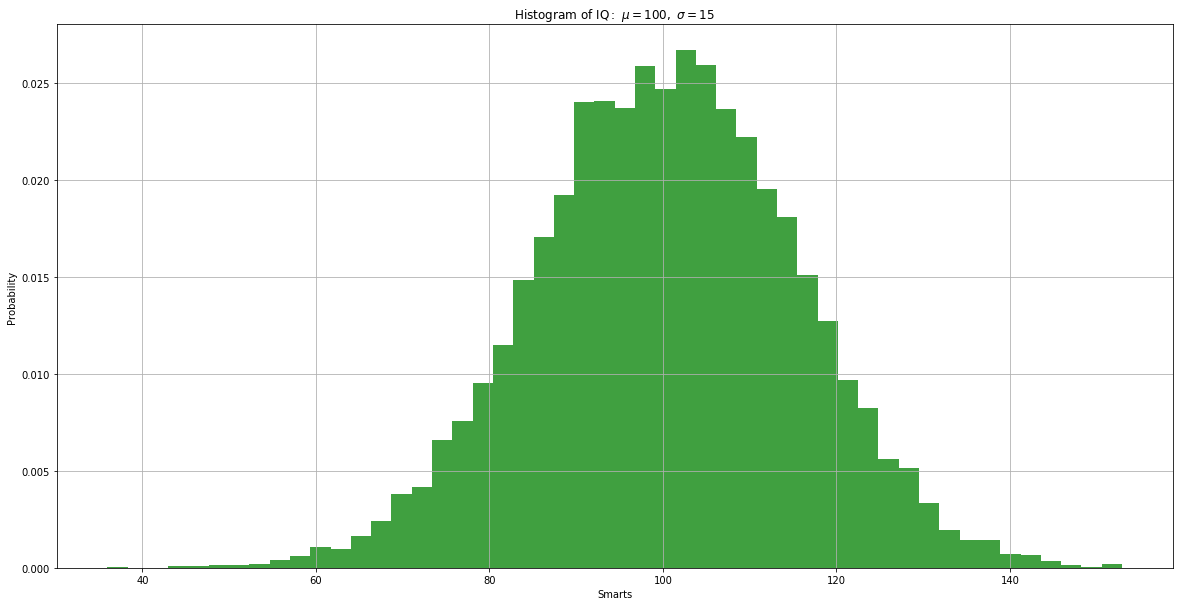

In [353]:
# the histogram of the data
plt.hist(x, 50, normed=1, facecolor='green', alpha=0.75)
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$') # allows for latex formatting
# plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

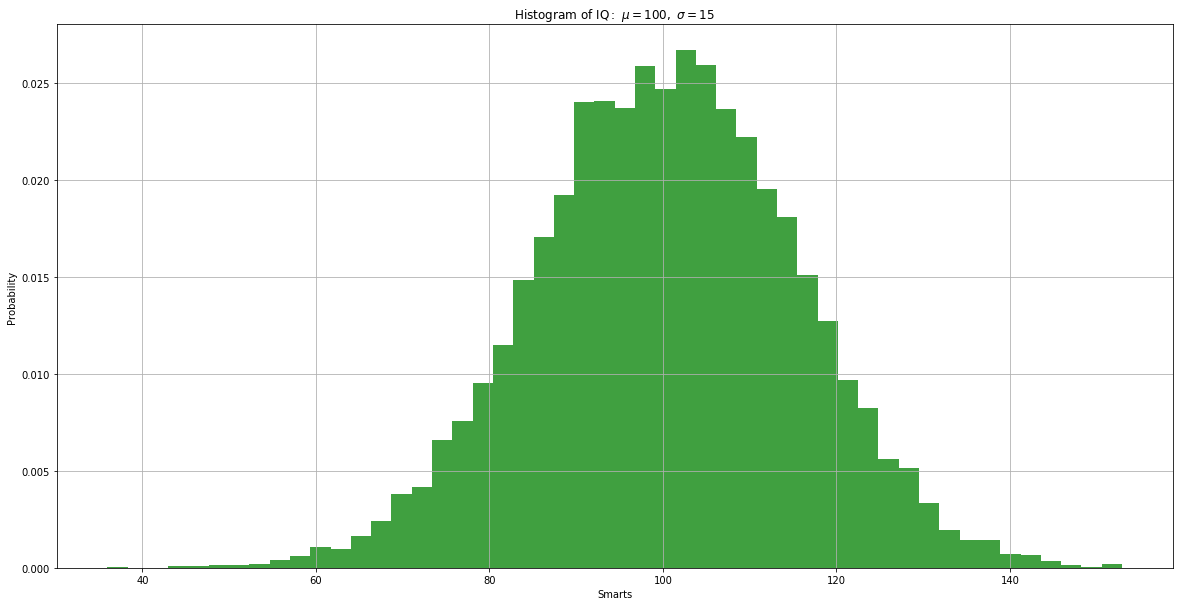

In [354]:
# the histogram of the data
plt.hist(x, 50, density=True, facecolor='green', alpha=0.75)
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$') # allows for latex formatting
# plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

Here's how we made our histogram before:

In [356]:
capped_face_value_data = penalty_data["FACE_VALUE"][penalty_data["FACE_VALUE"] < 1000]

plt.hist(capped_face_value_data)
plt.show()

NameError: name 'penalty_data' is not defined

Let's look at some of the things we can do to this. The docs for histograms are here: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist

We can go back to our initial, unfiltered, data:

This is still pretty naughty, we should have at least a title and some axis lables.

We do that by setting some more properties on the `plt` object:

If we reimport the date, but with a bit more cleverness, we can tell pandas to convert the dates to actual dates.

Because _we_ are civilised, we use either iso dates `YYYY-MM-DD` or `DD-MM-YYYY`, but often you'll have to deal with data prepared by savages who don't respect this rational behaviour. They will use `MM-DD-YY` and other such primitive formats.

The settings used here control how it's read. You can only really tell by looking at the data and working it out. E.g. are there months bigger than 12?

This is some straight up, powerful voodoo.

We're grouping the fines by month, and then adding up the groups. Pandas' `groupby` feature allows for all kinds of clever stuff like that.

I don't expect you to learn this this week, I just want to give you a taste of what can be done, quite simply, with pandas and matplotlib.

# some tricky tricks

Say you have a _lot_ of rows, running things on them takes a long time. You can test on a subset of that and then come bakc to the full dataframe once you are more sure that it works.

To do this we can use python slices in combination with the dataframe's `.loc` property.

Let's say you want to apply a function to each row in a dataframe, and save the result as a new column in the dataframe. This is where `apply` come in handy.

Above is equivalent to below, it's up to you to decide what is more readable.

How do we tell the computer to treat _facade_ and _fašade_ the same? What about _University of new south wales_, _University of New South Wales_, _University of NSW_, _UNSW_, _New-south_?

## The answer is _folding_

_(This is a "pattern")_

# _fin_